In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CommonModules.LoadMagneticField import read
from CommonModules.BiSplineDer import UniBiSpline
from CommonModules.BiSplineDer import BiSpline
from CommonModules.PlasmaEquilibrium import IntSample, StixParamSample
from CommonModules.PlasmaEquilibrium import TokamakEquilibrium
from CommonModules.input_data import InputData
from Tools.PlotData.CommonPlotting import plotting_functions

    

In [4]:
configfile = '/home/devlamin/WKbeam_simulations/TCV_87427_1.6_FIR_trial/RayTracing.txt'
idata = InputData(configfile)
Eq = TokamakEquilibrium(idata)

In [5]:
nptR=500
nptZ=500

Rmin = Eq.Rgrid[0,0] 
Rmax = Eq.Rgrid[-1,0] 
Zmin = Eq.zgrid[0,0] 
Zmax = Eq.zgrid[0,-1]

R = np.linspace(Rmin, Rmax, nptR)
z = np.linspace(Zmin, Zmax, nptZ)

Rm = R / 100. # converted from cm to m
Zm = z / 100. # converted from cm to m

RR, ZZ = np.meshgrid(R, z, indexing='ij')
    
    # Cyclotron and plasma frequency
StixX, StixY, field_and_density = StixParamSample(R, z, Eq, idata.freq)
Bt2d, BR2d, Bz2d, Ne2d = field_and_density
Te2d = IntSample(R, z, Eq.TeInt.eval)
Raxis, Zaxis = Eq.magn_axis_coord_Rz

B_p = np.sqrt(BR2d**2 + Bz2d**2)
q = np.sqrt((RR - Raxis)**2 + (ZZ - Zaxis)**2)*Bt2d / (RR*B_p)

In [7]:
psi = IntSample(R, z, Eq.PsiInt.eval)

Text(0.5, 1.0, '$q$')

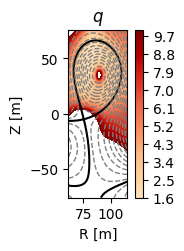

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Mask q values outside [0, 10]
q_masked = np.ma.masked_outside(np.abs(q), 0, 10)

plot_Bp = plt.subplot(2,3,3)
plot_Bp.set_aspect('equal')

Bp_grid = plot_Bp.contourf(
    R, z, q_masked,
    levels=100, cmap='OrRd', vmin=0, vmax=10
)

plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20),
                colors='grey', linestyles='dashed', linewidths=1)

# Set "bad" (masked) values to white
Bp_grid.cmap.set_bad(color='white')

plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$q$')



Apparently it's already stored in rho, not in psi!

<>:23: DeprecationWarning: invalid escape sequence '\o'
<>:23: DeprecationWarning: invalid escape sequence '\o'
/tmp/ipykernel_2660669/985036113.py:23: DeprecationWarning: invalid escape sequence '\o'
  """


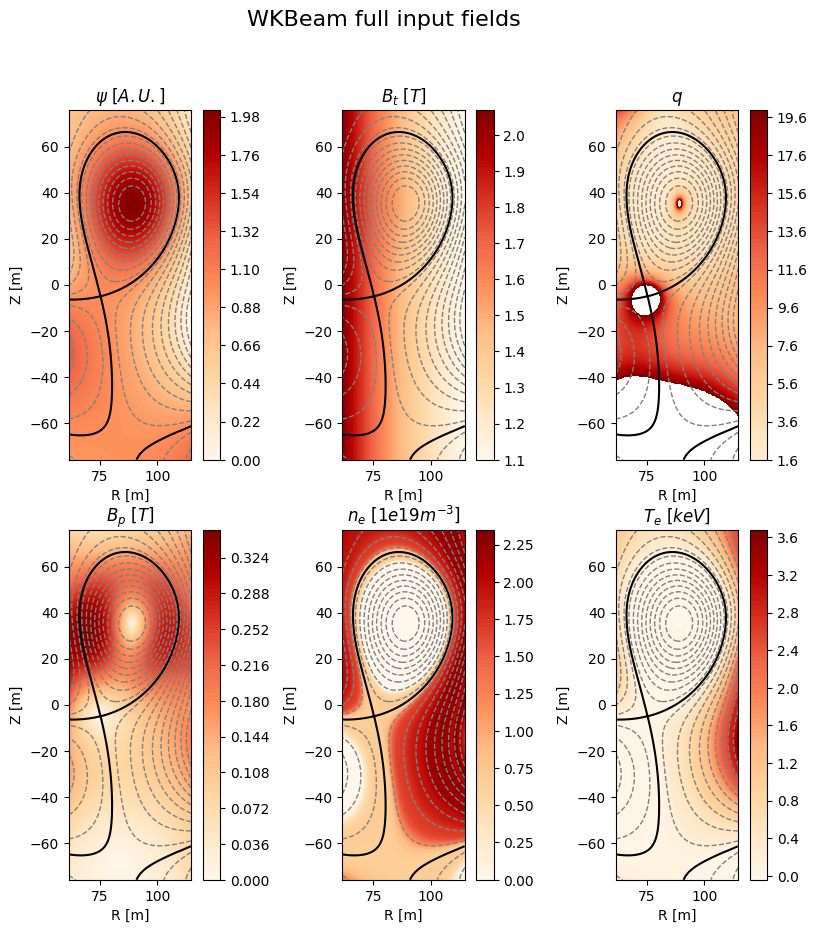

In [9]:
plt.figure(figsize=(10,10))
plt.suptitle(r'WKBeam full input fields', fontsize=16)

plot_psi = plt.subplot(2,3,1)
plot_psi.set_aspect('equal')
psi_grid =plot_psi.contourf(R, z, psi, levels=100, cmap='OrRd')
plot_psi.contour(R, z, psi, [1], colors='black')
plot_psi.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(psi_grid)
plot_psi.set_xlabel('R [m]')
plot_psi.set_ylabel('Z [m]')
plot_psi.set_title(r'$\psi\ [A.U.]$')

plot_Bt = plt.subplot(2,3,2)
plot_Bt.set_aspect('equal')
Bt_grid = plot_Bt.contourf(R, z, Bt2d, levels=100, cmap='OrRd')
plot_Bt.contour(R, z, psi, [1], colors='black')
plot_Bt.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bt_grid)
plot_Bt.set_xlabel('R [m]')
plot_Bt.set_ylabel('Z [m]')
plot_Bt.set_title(r'$B_t\ [T]$')
"""
plot_S = plt.subplot(2,3,3)
plot_S.set_aspect('equal')
c_Y = plot_S.contourf(R, z, StixY, 100, cmap='OrRd')
plt.colorbar(c_Y, ax=plot_S, format="%1.2f")
plotting_functions.add_cyclotron_resonances(R, z, StixY, plot_S)
plot_S.set_title(r'$\omega_{c \mathrm{e}}/\omega$')
h1, h2, h3 = plotting_functions.add_cyclotron_resonances(R, z, StixY, plot_S)
O_cutoff = plotting_functions.add_Omode_cutoff(R, z, StixX, plot_S)
X_cutoff = plotting_functions.add_Xmode_cutoff(R, z, StixX, StixY, plot_S)
UH_res = plotting_functions.add_UHresonance(R, z, StixX, StixY, plot_S)
plot_S.contour(R, z, psi, [1], colors='black')
plot_S.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plot_S.set_xlabel('R [m]')
plot_S.set_ylabel('Z [m]')
"""


q_masked = np.ma.masked_outside(np.abs(q), 0, 20)

plot_Bp = plt.subplot(2,3,3)
plot_Bp.set_aspect('equal')

Bp_grid = plot_Bp.contourf(
    R, z, q_masked,
    levels=100, cmap='OrRd', vmin=0, vmax=20
)

plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20),
                colors='grey', linestyles='dashed', linewidths=1)

# Set "bad" (masked) values to white
#Bp_grid.cmap.set_bad(color='white')

plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$q$')


plot_Bp = plt.subplot(2,3,4)
plot_Bp.set_aspect('equal')
Bp_grid = plot_Bp.contourf(R, z, B_p, levels=100, cmap='OrRd')
plot_Bp.contour(R, z, psi, [1], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$B_p\ [T]$')



plot_ne = plt.subplot(2,3,5)
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(R, z, Ne2d, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [1], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(ne_grid)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [1e19 m^{-3}]$')

plot_Te = plt.subplot(2,3,6)
plot_Te.set_aspect('equal')
Te_grid = plot_Te.contourf(R, z, Te2d, levels=100, cmap='OrRd')
plot_Te.contour(R, z, psi, [1], colors='black')
plot_Te.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Te_grid)
plot_Te.set_xlabel('R [m]')
plot_Te.set_ylabel('Z [m]')
plot_Te.set_title(r'$T_e\ [keV]$')

plt.savefig('WKBeam_input_fields.pdf', dpi=300)
plt.show()

## Trying to update the ne profile

In [214]:
def get_top_struct_key(mat_dict_or_file):
    """Return the first non-metadata key from a loaded MATLAB .mat or .h5 file.
    Filters out known non-data keys like refs and metadata.
    """

    ignore_keys = {'__header__', '__version__', '__globals__', '#refs#'}
    valid_keys = [k for k in mat_dict_or_file.keys() if k not in ignore_keys]

    if not valid_keys:
        raise ValueError("No valid struct keys found in file")

    # if you expect 'lukestructs', try to prioritize that
    for k in valid_keys:
        if 'lukestructs' in k.lower():
            return k

    # otherwise just return the first valid one
    return valid_keys[0]

In [215]:
import scipy.io as sio

FIR_data = sio.loadmat('/home/devlamin/WKbeam_simulations/TCV_87427_1.6_FIR_trial/input/FIR_TS_data2.mat')

In [216]:
get_top_struct_key(FIR_data)

dat = FIR_data['data'][0,0]
FIR_R = dat[0][:, 0]
FIR_dat = dat[1][:, 0]
TS_Z = dat[3][:].T
TS_dat = dat[2][:].T

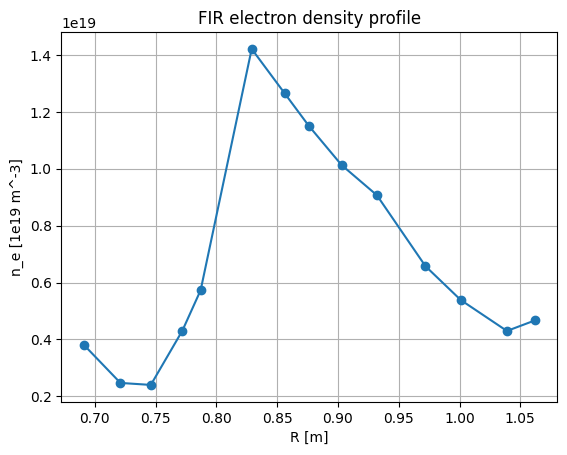

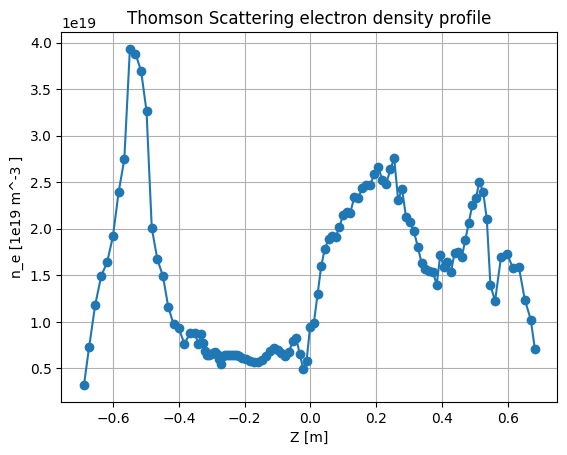

In [217]:
plt.plot(FIR_R, FIR_dat, 'o-')
plt.xlabel('R [m]')
plt.ylabel('n_e [1e19 m^-3]')
plt.title('FIR electron density profile')
plt.grid()
plt.show()

plt.plot(TS_Z, TS_dat, 'o-')
plt.xlabel('Z [m]')
plt.ylabel('n_e [1e19 m^-3 ]')
plt.title('Thomson Scattering electron density profile')
plt.grid()
plt.show()

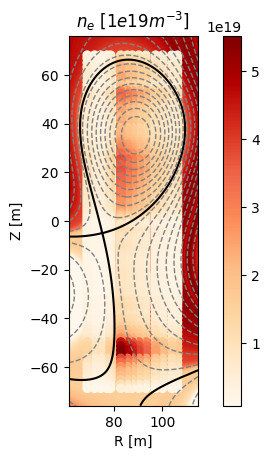

In [218]:
# Create scaling factors relative to the middle Ne2 value
scales = FIR_dat / FIR_dat[5]   # [Ne2(0)/Ne2(1), 1.0, Ne2(2)/Ne2(1)]

# Tile Ne into 3 rows, each scaled appropriately
Ne_grid = (scales[np.newaxis,:] * TS_dat).T

[Rnew, Znew] = np.meshgrid(100*FIR_R, 100*TS_Z, indexing='ij')
plot_ne = plt.subplot()
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(R, z, Ne2d, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [1], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [1e19 m^{-3}]$')
ne_grid2 = plot_ne.scatter(Rnew, Znew, c=Ne_grid, cmap='OrRd')
plt.colorbar(ne_grid2)


/tmp/ipykernel_2660669/4208579698.py:27: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline_fit = UnivariateSpline(psi_TS_inside_sorted, Ne_inside_smooth, s=10, ext=3)


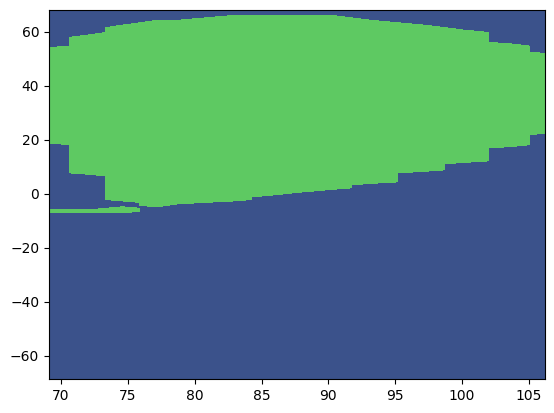

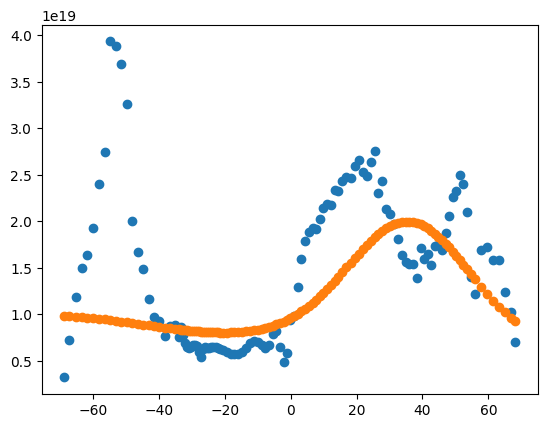

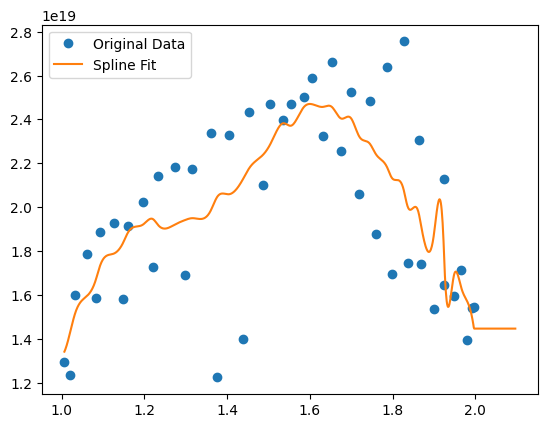

In [231]:
from scipy.signal import savgol_filter

# Try to fix the density inside the separatrix to match FIR and TS data better
psiLCFS = IntSample(100*FIR_R, 100*TS_Z, Eq.PsiInt.eval).T
inside_mask = (psiLCFS >= 1.0) & (Znew >= -0.07*100)
plt.figure()
plt.contourf(Rnew, Znew, inside_mask)
plt.figure()
# Inside the mask, use the values from TS, and find the corresponding psi values first
psi_TS = psiLCFS[5,:]
plt.plot(Znew[5,:], Ne_grid[5,:], 'o')
plt.plot(Znew[5,:], psi_TS*1e19, 'o')

Ne_inside = Ne_grid[5, inside_mask[5,:]]
psi_TS_inside = psi_TS[inside_mask[5,:]]
# Also remove psi values that are within 0.01 of each other to avoid overfitting
unique_psi_indices = np.unique(np.round(psi_TS_inside, decimals=2), return_index=True)[1]
psi_TS_inside = psi_TS_inside[unique_psi_indices]
Ne_inside = Ne_inside[unique_psi_indices]

# Now get a smoothed fit through these points, after having sorted them by psi
sort_indices = np.argsort(psi_TS_inside)
psi_TS_inside_sorted = psi_TS_inside[sort_indices]
Ne_inside_sorted = Ne_inside[sort_indices]
Ne_inside_smooth = savgol_filter(Ne_inside_sorted, window_length=20, polyorder=2)
from scipy.interpolate import UnivariateSpline
spline_fit = UnivariateSpline(psi_TS_inside_sorted, Ne_inside_smooth, s=10, ext=3)
psi_fine = np.linspace(np.amin(psi_TS_inside_sorted), np.amax(psi_TS_inside_sorted)+0.1, 1000)
Ne_fit = spline_fit(psi_fine)

fig = plt.figure()
plt.plot(psi_TS_inside, Ne_inside, 'o', label='Original Data')
plt.plot(psi_fine, Ne_fit, '-', label='Spline Fit')
plt.legend()




In [232]:
# Now apply this fit to the entire grid inside the separatrix
Ne_grid_fixed = Ne_grid.copy()
Ne_grid_fixed[inside_mask] = spline_fit(psiLCFS[inside_mask])
Ne_grid_fixed[Ne_grid_fixed < 0] = 0.0  # Ensure no negative densities


Text(0.5, 1.0, '$n_e\\ [1e19 m^{-3}]$')

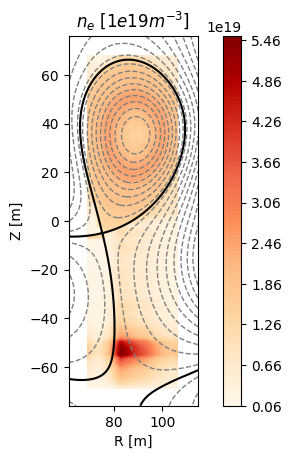

In [233]:
plot_ne = plt.subplot()
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(Rnew, Znew, Ne_grid_fixed, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [1], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(ne_grid)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [1e19 m^{-3}]$')
#plot_ne.scatter(Rnew, Znew, c=Ne_grid, cmap='OrRd')

In [234]:
# Extrapolate the fixed density grid to the full simulation grid
from scipy.interpolate import RegularGridInterpolator
interp_func = RegularGridInterpolator(
    (Rnew[:,0], Znew[0,:]), Ne_grid_fixed, bounds_error=False, fill_value=0)
Ne_full_grid = interp_func((RR, ZZ))



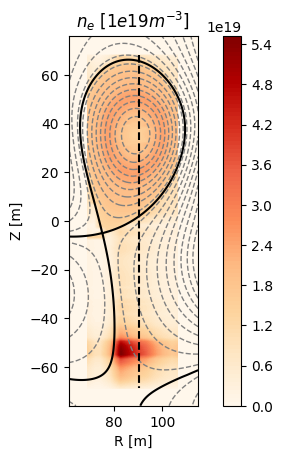

In [235]:
plot_ne = plt.subplot()
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(RR, ZZ, Ne_full_grid, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [1], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(ne_grid)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [1e19 m^{-3}]$')
# PLot the Thomson LOS
plot_ne.vlines(FIR_R[5]*100, ymin=TS_Z[0]*100, ymax=TS_Z[-1]*100, colors='k', linestyles='dashed')
#plot_ne.scatter(Rnew, Znew, c=Ne_grid, cmap='OrRd')

In [236]:
import os
import numpy as np

def write_WKB_nefile_simple(m, n, Req, Zeq, psisep, Ne, folder, machine=None, shot=None, time=None):
    """
    Write a simplified TORBEAM-style nefile containing grid geometry and 2D Ne data.

    Parameters
    ----------
    m, n : int
        Number of grid points in radial (R) and vertical (Z) directions.
    Req : array_like
        1D array of radial coordinates [m].
    Zeq : array_like
        1D array of vertical coordinates [m].
    psisep : float
        Psi at separatrix (usually 1.0).
    Ne : 2D array_like
        Electron density array of shape (m, n).
    folder : str
        Directory to save the file into.
    machine : str, optional
        Machine name to include in header.
    shot : int, optional
        Shot number to include in header.
    time : float, optional
        Time in seconds to include in header.
    """
    # --- Sanity checks ---
    Req = np.asarray(Req).flatten()
    Zeq = np.asarray(Zeq).flatten()
    Ne = np.asarray(Ne)

    assert Ne.shape == (m, n), f"Ne must have shape ({m},{n}), got {Ne.shape}"
    assert np.isscalar(psisep), "psisep must be scalar"

    # Flatten Ne in the same way as MATLAB’s reshape(Ne',1,[])
    Ne_flat = Ne.T.flatten()

    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, 'nefile')

    with open(filepath, 'w') as f:
        f.write("Number of radial and vertical grid points:\n ")
        f.write(f"{m:d} {n:d}\n")

        f.write("Inside and outside radius and psi_sep:\n")
        f.write(f"{0:d} {0:d} {psisep:3.5g}\n")

        f.write("Radial coordinate [m]\n")
        f.write(" ".join(f"{x: .9e}" for x in Req) + "\n")

        f.write("Vertical coordinate [m]\n")
        f.write(" ".join(f"{x: .9e}" for x in Zeq) + "\n")

        f.write("Ne values [m^-3]\n")
        f.write(" ".join(f"{x: .9e}" for x in Ne_flat) + "\n")

    print(f"Wrote {filepath}")


m, n = Ne_full_grid.shape
psi_sep = 1.0
output_folder = '/home/devlamin/WKbeam_simulations/TCV_87427_1.6_FIR_trial/input'
write_WKB_nefile_simple(
    m, n, R/100, z/100, psi_sep, Ne_full_grid,
    output_folder,
    machine='TCV',
    shot=87427,
    time=1.55
)

Wrote /home/devlamin/WKbeam_simulations/TCV_87427_1.6_FIR_trial/input/nefile
